In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 150)

In [2]:
df = pd.read_csv('data/class2022.csv')
df['FPPG'] = df['PPG'] + 2*df['ORB'] + 1.5*df['DRB'] + 2*df['APG'] + 2.5*df['BPG'] + 2.5*df['SPG'] + -.5*(df['FTA'] - df['FTM'])
df['FPPM'] = round(df['FPPG'] / df['MPG'], 2)
df = df.sort_values(by = 'FPPM', ascending = False).head(100).reset_index(drop = True)
draftees = df[['Player', 'FPPG', 'FPPM', 'MPG', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'FG%', '3P%', 'FT%']]
draftees.head(5)
# These are the 5 most efficient players in the draft class

,Player,FPPG,FPPM,MPG,PPG,RPG,APG,SPG,BPG,FG%,3P%,FT%
0,Trevion Williams,33.45,1.68,19.9,12.0,7.4,3.0,0.9,0.6,0.547,0.357,0.597
1,Chet Holmgren,44.45,1.65,26.9,14.1,9.9,1.9,0.8,3.7,0.607,0.390,0.717
2,Kenny Lofton Jr.,43.35,1.61,27.0,16.5,10.5,2.8,1.2,0.7,0.539,0.200,0.672
3,Walker Kessler,40.25,1.58,25.5,11.4,8.1,0.9,1.1,4.6,0.608,0.200,0.596
4,Keegan Murray,48.35,1.52,31.9,23.5,8.7,1.5,1.3,1.9,0.554,0.398,0.747


In [3]:
df = pd.read_csv('data/sochan.csv')
df['FPPG'] = df['PTS'] + 2*df['ORB'] + 1.5*df['DRB'] + 2*df['AST'] + 2.5*df['BLK'] + 2.5*df['STL'] + -.5*(df['FTA'] - df['FT'])
df['FPPM'] = round(df['FPPG'] / df['MP'], 2)
df = df[['School', 'FPPG', 'FPPM', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%']].head(1)
df['School'] = 'Jeremy Sochan'
df.columns = draftees.columns
sochan = df

df = pd.DataFrame({'Player': 'Shaedon Sharpe', 'MPG': [28.3], 'PPG': [22.6], 'ORB': [1.0], 'DRB': [4.8], 
                   'RPG': [5.8], 'APG': [2.7], 'SPG': [0.8], 'BPG': [0.4], 'FG%': [0.479], '3P%': [0.364], 
                   'FT%': [0.635]})
df['FPPG'] = df['PPG'] + 2*df['ORB'] + 1.5*df['DRB'] + 2*df['APG'] + 2.5*df['BPG'] + 2.5*df['SPG'] -2.8
df['FPPM'] = round(df['FPPG'] / df['MPG'], 2)
sharpe = df[['Player', 'FPPG', 'FPPM', 'MPG', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'FG%', '3P%', 'FT%']]

# Had to manually add Jeremy Sochan and Shaedon Sharpe since their stats were not in the original dataset

In [4]:
df = pd.read_csv('data/gli2022.csv')
df['FPPG'] = df['PPG'] + 2*df['ORB'] + 1.5*df['DRB'] + 2*df['APG'] + 2.5*df['BPG'] + 2.5*df['SPG'] + -.5*(df['FTA'] - df['FTM'])
df['FPPM'] = round(df['FPPG'] / df['MPG'], 2)
df = df.sort_values(by = 'FPPG', ascending = False).head(100).reset_index(drop = True)
gli = df[['Player', 'FPPG', 'FPPM', 'MPG', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'FG%', '3P%', 'FT%']]
gli = gli.head(4)
foster = gli.head(1)
gli

# Also had to pull the prospects from G-League Ignite stats

,Player,FPPG,FPPM,MPG,PPG,RPG,APG,SPG,BPG,FG%,3P%,FT%
0,Michael Foster Jr.,39.05,1.31,29.9,14.8,8.7,2.0,0.8,1.9,0.490,0.313,0.750
1,MarJon Beauchamp,37.05,1.01,36.6,15.1,7.3,2.5,1.5,0.6,0.571,0.242,0.650
2,Dyson Daniels,36.80,1.18,31.2,11.3,6.2,4.4,1.9,0.7,0.449,0.255,0.737
3,Jaden Hardy,35.10,1.09,32.2,17.7,4.6,3.2,1.3,0.3,0.351,0.269,0.882


In [5]:
combined = draftees.append(gli).append(sochan).append(sharpe)
combined = combined.sort_values(by = 'FPPG', ascending = False).reset_index(drop = True)
print('Total Prospects:', len(combined))

Total Prospects: 103


In [6]:
draft = pd.read_csv('data/draft2022.csv')
draft = draft[['Unnamed: 1', 'Unnamed: 2', 'Roun']]
draft.columns = draft.iloc[0]
draft = draft[1:]
draft = draft.dropna()
draft = draft[draft['Pk'] != 'Pk']
draft = draft[['Pk', 'Player', 'Tm']]

merged = pd.merge(draft, combined, on='Player').set_index('Pk')
print('Draftees:', len(merged))
breakk = pd.DataFrame({'Player': ['END OF DRAFT', '']})
merged = merged.append(breakk).append(foster)

merged.head(5)
# 58 total draftees is correct because 2 picks were forfeited as punishment for tampering
# Top 5 picks from the actual 2022 NBA draft

Draftees: 58


,Player,Tm,FPPG,FPPM,MPG,PPG,RPG,APG,SPG,BPG,FG%,3P%,FT%
1,Paolo Banchero,ORL,40.50,1.23,33.0,17.2,7.8,3.2,1.1,0.9,0.478,0.338,0.729
2,Chet Holmgren,OKC,44.45,1.65,26.9,14.1,9.9,1.9,0.8,3.7,0.607,0.390,0.717
3,Jabari Smith Jr.,HOU,37.25,1.29,28.8,16.9,7.4,2.0,1.1,1.0,0.429,0.420,0.799
4,Keegan Murray,SAC,48.35,1.52,31.9,23.5,8.7,1.5,1.3,1.9,0.554,0.398,0.747
5,Jaden Ivey,DET,34.20,1.09,31.5,17.3,4.9,3.1,0.9,0.6,0.460,0.358,0.744


In [7]:
print('Mean Values from drafted players:')
merged[['FPPG', 'FPPM', 'MPG', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'FG%', '3P%', 'FT%']].head(58).mean()

Mean Values from drafted players:


FPPG    30.958621
FPPM     1.099138
MPG     28.153448
PPG     13.027586
RPG      5.660345
APG      2.279310
SPG      0.998276
BPG      0.858621
FG%      0.484190
3P%      0.295138
FT%      0.731690
dtype: float64

In [8]:
ud_names = []

for p in draftees['Player']:
    if p not in list(merged['Player']):
        ud_names.append(p)
        
ud = draftees[draftees['Player'].isin(ud_names)]
with_ufa = merged.append(ud).head(100)
with_ufa.reset_index(inplace=True, drop=True)
with_ufa.index = with_ufa.index + 1

In [9]:
def change_teams(player, new_team):
    idx = int(with_ufa[with_ufa['Player'] == player].index[0])
    with_ufa.iat[idx-1, 1] = new_team

In [10]:
## DRAFT DAY TRADES

todo = [
    ['Ousmane Dieng', 'OKC'],
    ['Jalen Duren', 'DET'],
    ['Jake LaRavia', 'MEM'],
    ['Walker Kessler', 'MIN'],
    ['David Roddy', 'MEM'],
    ['Wendell Moore Jr.', 'MIN'],
    ['TyTy Washington Jr.', 'HOU'],
    ['Peyton Watson', 'DEN'],
    ['Gabriele Procida', 'DET'],
    ['Jaden Hardy', 'DAL'],
    ['Kennedy Chandler', 'MEM'],
    ['Bryce McGowens', 'CHA'],
    ['Ryan Rollins', 'GSW'],
    ['Josh Minott', 'CHO'],
    ['Ismael Kamagate', 'DEN'],
    ['Kendall Brown', 'IND'],
    ['Tyrese Martin', 'ATL'],
    ['Gui Santos', 'MIL'],
    ['Hugo Besson', 'MIL']
]

for a in todo:
    change_teams(a[0], a[1])

In [11]:
def check(player):
    if player in list(with_ufa['Player']):
        print('YES\n', player)
    else:
        print('NO\n', player, 'is not in draftees')

In [12]:
## 2-WAY, UDFA DEALS

todo = [
    ['Scotty Pippen Jr.', 'LAL'],
    ['Collin Gillespie', 'DEN'],
    ['Ron Harper', 'TOR'],
    ['Buddy Boeheim', 'DET'],
    ['Trevor Hudgins', 'HOU'],
    ['Julian Champagnie', 'PHI'],
    ['Michael Foster Jr.', 'PHI'],
    ['Dereon Seabron', 'NOR'],
    ['Keon Ellis', 'SAC'],
    ['Justin Lewis', 'CHI'],
    ['Alondes Williams', 'BRK'],
    ['Kenny Lofton Jr.', 'MEM'],
    ['Johnny Juzang', 'UTA'],
    ['Kofi Cockburn', 'UTA'],
    ['Iverson Molinar', 'MIL'],
    ['AJ Green', 'MIL'],
    ['Orlando Robinson', 'MIA'],
    ['Trevion Williams', 'BOS']
]

for a in todo:
    change_teams(a[0], a[1])

In [13]:
with_ufa.style.background_gradient(cmap = 'RdYlGn',
                                subset = (with_ufa.index[:],
                                         with_ufa.columns[2:4])).format(precision = 2).highlight_null('red')


,Player,Tm,FPPG,FPPM,MPG,PPG,RPG,APG,SPG,BPG,FG%,3P%,FT%
1,Paolo Banchero,ORL,40.50,1.23,33.00,17.20,7.80,3.20,1.10,0.90,0.48,0.34,0.73
2,Chet Holmgren,OKC,44.45,1.65,26.90,14.10,9.90,1.90,0.80,3.70,0.61,0.39,0.72
3,Jabari Smith Jr.,HOU,37.25,1.29,28.80,16.90,7.40,2.00,1.10,1.00,0.43,0.42,0.80
4,Keegan Murray,SAC,48.35,1.52,31.90,23.50,8.70,1.50,1.30,1.90,0.55,0.40,0.75
5,Jaden Ivey,DET,34.20,1.09,31.50,17.30,4.90,3.10,0.90,0.60,0.46,0.36,0.74
6,Bennedict Mathurin,IND,34.50,1.06,32.60,17.70,5.60,2.50,1.00,0.30,0.45,0.37,0.76
7,Shaedon Sharpe,POR,37.40,1.32,28.30,22.60,5.80,2.70,0.80,0.40,0.48,0.36,0.64
8,Dyson Daniels,NOP,36.80,1.18,31.20,11.30,6.20,4.40,1.90,0.70,0.45,0.26,0.74
9,Jeremy Sochan,SAS,27.80,1.11,25.10,9.20,6.40,1.80,1.30,0.70,0.47,0.30,0.59
10,Johnny Davis,WAS,40.95,1.20,34.20,19.70,8.20,2.10,1.20,0.70,0.43,0.31,0.79


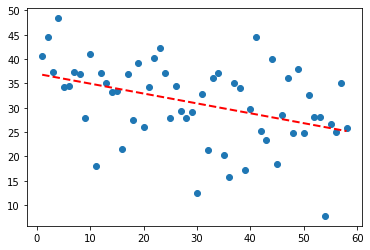

In [14]:
x = with_ufa.head(58).index
y = with_ufa.head(58)['FPPG']

plt.scatter(x=x, y=y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), color="red", linewidth=2, linestyle = '--')
plt.show()

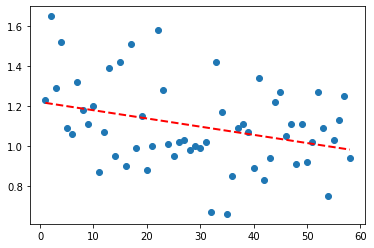

In [15]:
x = with_ufa.head(58).index
y = with_ufa.head(58)['FPPM']

plt.scatter(x=x, y=y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), color="red", linewidth=2, linestyle = '--')
plt.show()